In [38]:
import os

import numpy as np
import pandas as pd
import collections

import seaborn as sns
from utils.plot import plt

In [8]:
from ESG.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, FIGURE_DIR, RESULT_DIR
from utils.data_porter import save_to_csv

In [23]:
esg_news = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'a_esg_news.csv'),
                        dtype={'INDICATOR_CODE': str, 'TICKER': str},
                        parse_dates=['LISTING_DATE'])

In [24]:
esg_news['STOCK_CODE'] = [str(esg_news['TICKER'][i]) + '.' + esg_news['EXCHANGE'][i][:2] for i in range(esg_news.shape[0])]
esg_news = esg_news[~pd.isnull(esg_news['INDICATOR_CODE'])]

In [26]:
esg_news['INDICATOR_CODE'].unique()

array(['003001N01', '003004N01', '003001N02', '002005N03', '003001N03',
       '003001N10', '002003N01', '003001N05', '003001N09', '003002N01',
       '002001N03', '001001N02', '002005N02', '002001N01', '003004N02',
       '002004N01', '003001N08', '001001N01', '003001N04', '002005N01',
       '003001N06', '001009N01', '003001N07', '002001N02', '002003N02',
       '001003N01', '001002N01'], dtype=object)

In [27]:
indicator_codesN = pd.read_excel(os.path.join(RAW_DATA_DIR, 'Indicator_codesN.xlsx'), dtype={'编码': str})
esg_news_ = pd.merge(esg_news, indicator_codesN, how='inner', left_on='INDICATOR_CODE', right_on='编码').iloc[:, :-1].sort_values(by=['INDICATOR_CODE']).reset_index(drop=True)

In [33]:
collections.Counter(esg_news_['INDICATOR_CODE'])
major_indicators = ('001001N01', '001001N02', '002003N01', '002004N01', '002005N03')
esg_news_major = esg_news_[esg_news_['INDICATOR_CODE'].apply(lambda x: x in major_indicators)].copy().reset_index(drop=True)

In [ ]:
#出现最多的五类非别为环境违规，正面环境事件，安全事故，社会贡献，投诉维权

In [35]:

esg_news_['一级'].unique()
esg_news_['二级'].unique()
esg_news_['三级'].unique()

array(['环境违规', '正面环境事件', '排放超标', '三废处置不当', '破坏生态环境', '劳工管理违规', '工作条件恶劣',
       '薪资违规', '安全事故', '危险物质事故', '社区贡献', '网络数据安全', '产品安全质量', '投诉维权'],
      dtype=object)

In [36]:
a = esg_news_.groupby(by='TICKER').apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


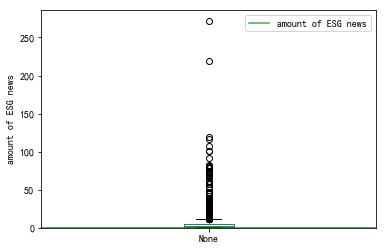

In [40]:
fig,axes = plt.subplots()
a.plot(kind='box',ax=axes)
axes.set_ylabel('amount of ESG news')
fig.savefig('boxplot1.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


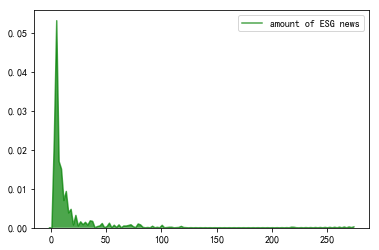

In [41]:
sns.kdeplot(a,shade=True, color="g", label="amount of ESG news", alpha=.7)

In [ ]:
#总体而言，绝大对数企业的ESG事件相关新闻数量较少,但是仍然有部分企业(34家）有超过50条
#ESG事件有关的新闻报道，占总数的2%。同时有两家企业有超过200条ESG相关新闻，分别为比亚迪（002594.SZ）和宁德时代（300750.SZ）。
#据此也可以发现广受社会大众和投资者关注的或处在与ESG紧密相关赛道中的企业会有更多的ESG相关新闻，新闻数量与企业实际在ESG方面的运营成果没有直接关系。

In [56]:
byd = esg_news_[esg_news_['TICKER'] == '002594']
ninde = esg_news_[esg_news_['TICKER'] == '300750']

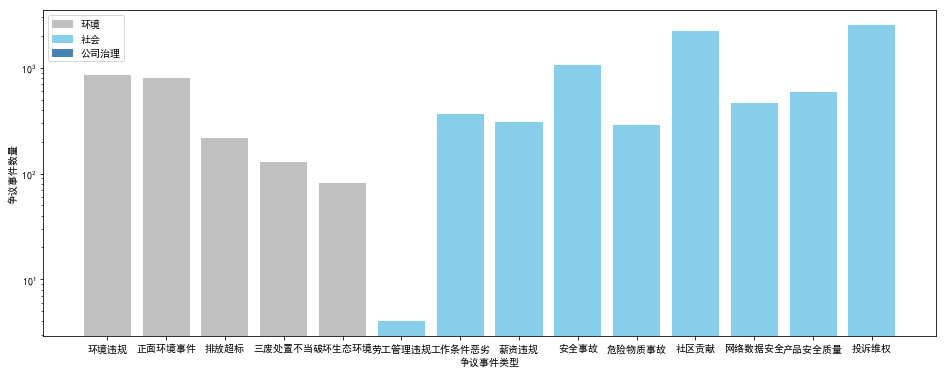

In [60]:
import matplotlib.patches as pch

plt.figure(figsize=(16, 6))
indicator_counts = esg_news_.groupby(by=['INDICATOR_CODE']).apply(len)
xlabels = list()
colors = ('#C0C0C0', '#87CEEB', '#4682B4')
for i in range(len(indicator_counts)):
    plt.bar(i, indicator_counts[i], color=colors[int(indicator_counts.index[i][:3]) - 1])
    xlabels.append(indicator_codesN.loc[indicator_codesN['编码'] == indicator_counts.index[i], '三级'].values[0])
plt.xticks(np.arange(len(indicator_counts)), xlabels, rotation=0)
plt.xlabel('争议事件类型')
plt.yscale('log')
plt.ylabel('争议事件数量')
plt.legend(handles=[pch.Patch(color=c) for c in colors], labels=['环境', '社会', '公司治理'])
plt.savefig(os.path.join(FIGURE_DIR, '争议事件三级指标计数.png'))

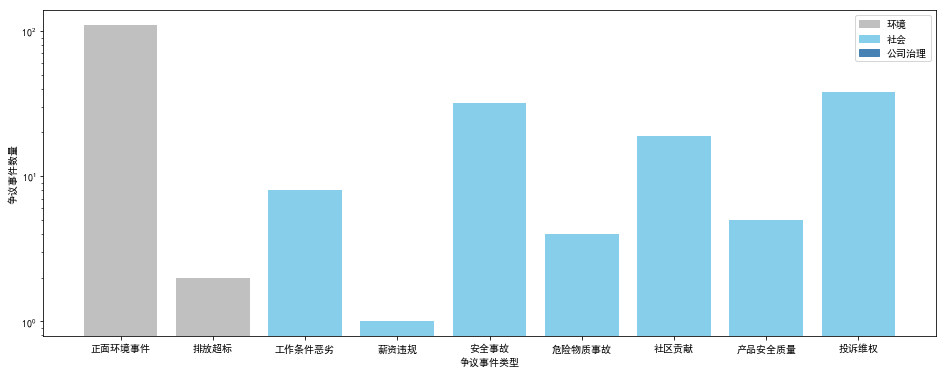

In [61]:
import matplotlib.patches as pch

plt.figure(figsize=(16, 6))
indicator_counts = byd.groupby(by=['INDICATOR_CODE']).apply(len)
xlabels = list()
colors = ('#C0C0C0', '#87CEEB', '#4682B4')
for i in range(len(indicator_counts)):
    plt.bar(i, indicator_counts[i], color=colors[int(indicator_counts.index[i][:3]) - 1])
    xlabels.append(indicator_codesN.loc[indicator_codesN['编码'] == indicator_counts.index[i], '三级'].values[0])
plt.xticks(np.arange(len(indicator_counts)), xlabels, rotation=0)
plt.xlabel('争议事件类型')
plt.yscale('log')
plt.ylabel('争议事件数量')
plt.legend(handles=[pch.Patch(color=c) for c in colors], labels=['环境', '社会', '公司治理'])
plt.savefig(os.path.join(FIGURE_DIR, '比亚迪争议事件三级指标计数.png'))

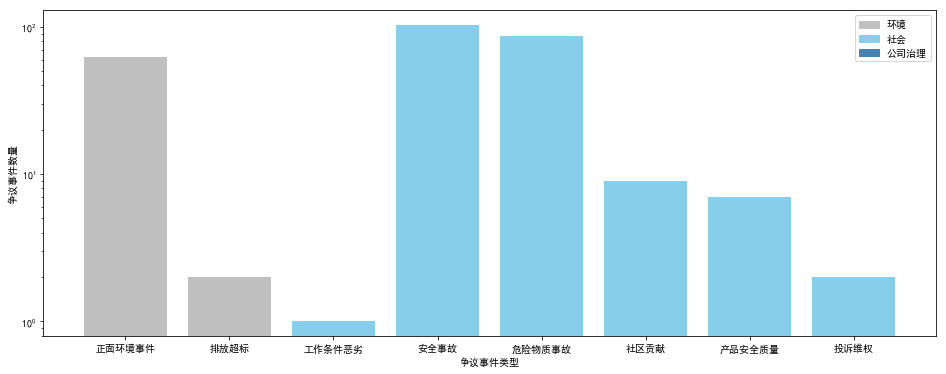

In [62]:
import matplotlib.patches as pch

plt.figure(figsize=(16, 6))
indicator_counts = ninde.groupby(by=['INDICATOR_CODE']).apply(len)
xlabels = list()
colors = ('#C0C0C0', '#87CEEB', '#4682B4')
for i in range(len(indicator_counts)):
    plt.bar(i, indicator_counts[i], color=colors[int(indicator_counts.index[i][:3]) - 1])
    xlabels.append(indicator_codesN.loc[indicator_codesN['编码'] == indicator_counts.index[i], '三级'].values[0])
plt.xticks(np.arange(len(indicator_counts)), xlabels, rotation=0)
plt.xlabel('争议事件类型')
plt.yscale('log')
plt.ylabel('争议事件数量')
plt.legend(handles=[pch.Patch(color=c) for c in colors], labels=['环境', '社会', '公司治理'])
plt.savefig(os.path.join(FIGURE_DIR, '宁德时代争议事件三级指标计数.png'))

In [ ]:
#在所有企业中，正面的环境事件和环境违规都大量共同出现，而社会争议事件中的新闻报道的频次差异不大，而社会大众较为关注的安全事故，投诉维权
#稍多，同时企业为了维护自身社会形象，也会大量呈现社会贡献有关的新闻。
#比较比亚迪和宁德时代的ESG争议事件，发现两者都有大量的正面环境事件相关新闻，而没有环境违规新闻，
#这可能与两家企业对自己主营业务中新能源带来的环保优势进行营销的结果。
#同时与这应业务有关的安全事故以及危险物质事故新闻也较为频繁出现。

In [65]:
N1 = esg_news_major[esg_news_major['INDICATOR_CODE'] == '001001N01'].groupby(by='TICKER').apply(len)
N2 = esg_news_major[esg_news_major['INDICATOR_CODE'] == '001001N02'].groupby(by='TICKER').apply(len)


ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>